## Setting up 

In [330]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

#Setting up the pandas to see all the columns - will take longer but very convenient
pd.set_option('display.max_columns', None)

# Load Dataset
dataset = pd.read_csv('~/Desktop/Speed Dating Experiment/Data/Speed Dating Data.csv', encoding="ISO-8859-1")

# EDA
## I. First look 
First, we're going to take a quick look at what we are working for, and potentially clean up a bit

In [331]:
# Taking a first look at the dataset
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [333]:
#Because we are displaying all of the rows, we're going to be careful about not displaying more than needed
#For those type of data, the average and distribution data is not particularly interesting to us, we will only display the number of non-null data (count) and the min and max to see what the data ranges between
dataset.describe(include='all').loc[['count','min','max']] 

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.0,8377.0,8378.0,8378.0,8378.0,8378.0,8378.0,8378.0,6532.0,8378.0,8378.0,8368.0,8378.0,8220.00,8378.0,8274.0,8305.0,8289.0,8289.0,8289.0,8280.0,8271.0,8249.0,8378.0,8166.0,8091.0,8072.0,8018.0,7656.0,7302.0,8128.0,8060.0,7993.0,8283.0,8315,8296.0,4914,3133,3583,8315.0,8299.0,8299.0,8299,7314,4279,8299.0,8281.0,8299.0,8289,8240.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8277.0,1800.0,8299.0,8299.0,8299.0,8289.0,8279.0,8257.0,6489.0,6489.0,6489.0,6489.0,6489.0,6467.0,8299.0,8299.0,8299.0,8299.0,8289.0,8289.0,8273.0,8273.0,8273.0,8273.0,8273.0,4906.0,4906.0,4906.0,4906.0,4906.0,8378.0,8176.0,8101.0,8082.0,8028.0,7666.0,7311.0,8138.0,8069.0,8003.0,7205.0,4096.0,4096.0,4096.0,4096.0,4096.00,4096.0,4000.0,4000.0,4000.0,4000.0,4000.0,7463.0,7463.0,7433.0,1984.0,1955.0,1984.0,1984.0,1955.0,1974.0,7445.0,7463.0,7463.0,7463.0,7463.00,7463.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.00,5775.0,5775.0,5775.0,7463.0,7463.0,7463.0,7463.0,7463.0,4377.0,4377.0,4377.0,4377.0,4377.0,3974.0,3974.0,3974.0,1496.0,668.0,3974.0,3974.0,3974.0,3974.0,3974.0,3974.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2016.0,3974.0,3974.0,3974.0,3974.0,3974.0,2016.0,2016.0,2016.0,2016.0,2016.0
min,1.0,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.83,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.00,0.0,3.0,1.0,4.0,3.0,2.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.00,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0
max,552.0,22.0,1.0,44.0,2.0,21.0,22.0,22.0,22.0,22.0,22.0,552.0,1.0,0.91,1.0,55.0,6.0,100.0,60.0,50.0,50.0,53.0,30.0,1.0,10.5,10.0,10.0,11.0,10.0,10.0,10.0,10.0,8.0,55.0,NaN,18.0,NaN,NaN,NaN,6.0,10.0,10.0,NaN,NaN,NaN,6.0,7.0,7.0,NaN,17.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,14.0,10.0,13.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,100.0,60.0,50.0,50.0,53.0,30.0,95.0,35.0,35.0,45.0,50.0,40.0,100.0,50.

In [334]:
# Closer look at number of participants as seemed some people said 551 participants (even though numbers in iid go up to 552)
print("The number of unique participant id is",dataset['iid'].nunique())

for a, b in zip(np.arange(1,553), dataset['iid'].unique()):
        if a != b: #Here we are essentially comparing our list of participants i.d. to a normal range from 1 to 552 to print where both array stop beeing equal, thus the missing participant i.d.
            print("The missing participant i.d. is {}".format(a))
            break #We break here because every number thereafter is going to be different and we don't need them to all be calculated/ printed

The number of unique participant id is 551
The missing participant i.d. is 118


<br>
<br>
Now, we're noticing quite a few interesting things here, namely: <br> <ul>
    * While participants i.d. go up to number 552, there is 551 participants in reality <br>
    * Only two genders in this data are included: Female and Male <br>
    * Participants' age ranged between 18 years old and 55 years old. Would be interesting to see the age difference between the matches? <br>
    * Little detail but compared to the key that says (p13) that Yes = 1, No = 2, that data seems to range between 0 & 1. We'll assume that 1 means there is a second date
<br>
</ul>
<br>

Now let's take a quick look at the matches


<br>

## Matches

In [348]:
# Let's see quickly how many matches we got in total (people can match with multiple people, and it does not mean the match is both ways)

#taking the mean for the data we expect them to remain constant for the same person (such as gender)
matches = dataset.groupby('iid').agg({'match':'sum', 
                         'gender':'mean',
                            'attr_o':['mean','max','sum'], #rating by partner the night of the event, for all 6 attributes
                            'expnum':'mean', #Quoted as "Out of the 20 people you will meet, how many do you expect will be interested in dating you?" to see how confident the person is 
                            'satis_2':'mean', #Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied)
                            'you_call':'mean', #How many have you contacted to set up a date?
                            'them_cal':'mean', #How many have contacted you?
                            'date_3':'mean', #Have you been on a date with any of your matches? Yes=1,No=0
                            'numdat_3':'mean', #If yes to above, how many of yours matches have you been on a date so far - interesting but loads of missing values!
                            'dec_o':'sum' #Partners decision the night of the event --> essentially how many people said yes to that particular person
                           })


matches.columns = [ '_'.join(x) for x in matches.columns ] #getting rid of multiindex and concatenating previous column name with function applied to it

matches['gender_mean'] = matches['gender_mean'].replace([0,1],['Male','Female']) # More convenient later on
matches.head()

,match_sum,gender_mean,attr_o_mean,attr_o_max,attr_o_sum,expnum_mean,satis_2_mean,you_call_mean,them_cal_mean,date_3_mean,numdat_3_mean,dec_o_sum
iid,,,,,,,,,,,,
1,4,Male,6.7,10.0,67.0,2.0,6.0,1.0,1.0,0.0,NaN,5
2,2,Male,7.7,10.0,77.0,5.0,5.0,0.0,0.0,0.0,NaN,6
3,0,Male,6.5,10.0,65.0,2.0,NaN,NaN,NaN,NaN,NaN,5
4,2,Male,7.0,10.0,70.0,2.0,4.0,0.0,0.0,0.0,NaN,6
5,2,Male,5.3,10.0,53.0,10.0,7.0,0.0,0.0,0.0,NaN,3


In [422]:
# Let's have still a broad look of who wanted to see their date again but visually
# Show in stacked bar chart

    # number of matches over number of dates (len)
    # same as above but separated for men / women
    # Two graphs one for condtn = 1 one for condtn = 2 --> check effect of condtn on number of matches 
    # Number of match one way, match both ways, match one way (three column charts)





fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("Distribution of number of match per person", "Number of matches vs Non matches",'Distribution of positive replies for Male','Distribution of positive replies for Female'))

fig.add_trace(
    go.Histogram(
        x = matches['match_sum']),
        row = 1,
        col = 1,
        )

fig.add_trace(
    go.Bar(
        y= dataset['match'].value_counts()/2,  #Dividing by two as match/no-match are double counted
        x=['No Match','Match'],
        width=0.5
        ),
        row = 1,
        col = 2
)

fig.add_trace(
    go.Box(
    x=matches[matches.gender_mean=='Male']['dec_o_sum'],
    boxpoints='all',
    jitter=0.5,
    pointpos=-1.8,
    name=""

     ),
    row = 2,
    col=1)

fig.add_trace(
    go.Box(
    x=matches[matches.gender_mean=='Female']['dec_o_sum'],
    boxpoints='all',
    jitter=0.5,
    pointpos=-1.8,
    name=""

     ),
    row = 2,
    col=2)

                              
fig.update_layout(
        title = go.layout.Title(text = "Quick look at matches", x = 0.5),
        showlegend = False)

In [433]:
#Now we clearly have some popular people here - let's save down the iid of whoever had over an 85% positive response rate for later to have a closer look
#Get iid for top 2 males and top 2 females
popular_female = pd.DataFrame(matches[matches.gender_mean=='Female'][matches.dec_o_sum>=17]['dec_o_sum']).rename({'dec_o_sum': 'Total Decisions'}, axis=1)
popular_male = pd.DataFrame(data=matches[matches.gender_mean=='Male'][matches.dec_o_sum>=17]['dec_o_sum']).rename({'dec_o_sum': 'Total Decisions'}, axis=1)
warnings.simplefilter('ignore')

dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [471]:
one_way_count = dataset[dataset.match==0][dataset.dec_o==1]['dec_o'].sum() #Count number of unrequrited love
match_count = dataset[dataset.match==1]['dec_o'].sum() #count number of meetings matched --> counts double as match goes both ways
no_love = len(dataset[dataset.match==0][dataset.dec_o==0]['dec_o'])

fig = px.bar(y=[match_count,one_way_count,no_love],x=['Match','One-way love','No love'],title='Count of outcomes')
fig.show()

# II. How the experiment affected their perception of themselves

Before Date:
How do you think you measure up?
Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):
attr3_1 
Attractive
sinc3_1
Sincere
int3_1
Intelligent
fun3_1
Fun
amb3_1
Ambitious

And finally, how do you think others perceive you? 
Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 (1=awful, 10=great) 
attr5_1 
Attractive
sinc5_1
Sincere
int5_1
Intelligent
fun5_1
Fun
amb5_1
Ambitious

During Date:
Please rate the importance of the following attributes in a potential date on a scale of 1-10: (1=not at all important, 10=extremely important).
attr1_s
Attractive______
sinc1_s
Sincere  ______
intel1_s
Intelligent _______
fun1_s
Fun _______
amb1_s
Ambitious  ________
shar1_s
Shared Interests/Hobbies  __________

Please rate your opinion of your own attributes, on a scale of 1-10 (1=awful, 10=great) --Be honest!
attr3_s
Attractive______
sinc3_s
Sincere  ______
intel3_s
Intelligent _______
fun3_s
Fun _______
amb3_s
Ambitious  ________


After Date:
How do you think you measure up?
Please rate your opinion of your own attributes, on a scale of 1-10 (1= awful and 10=great).  Be honest!
attr3_2 
Attractive
sinc3_2
Sincere
int3_2
Intelligent
fun3_2
Fun
amb3_2
Ambitious

And finally, how do you think others perceive you?
Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 (1=awful, 10=great)
attr5_2 
Attractive
sinc5_2
Sincere
int5_2
Intelligent
fun5_2
Fun
amb5_2
Ambitious

Please rate your opinion of your own attributes, on a scale of 1-10 (1= awful and 10=great).  Be honest!
attr3 _3
Attractive
sinc3_3
Sincere
intel3_3
Intelligent
fun3_3
Fun
amb3_3
Ambitious

And finally, how do you think others perceive you?
Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 (1=awful, 10=great)  
attr5_3 
Attractive
sinc5_3
Sincere
int5_3
Intelligent
fun5_3
Fun
amb5_3
Ambitious
	




In [591]:
# We will now look at people's perceptions of themselves & of how people perceive them 
#We're only interested in a certain amount of columns for that so we'll make a list of them to work with something more manageable

# Lazy way to look at it, but quick and following the same pattern throughout
list_columns = ['iid','gender','match','dec_o']
list_periods = ['3_1','5_1','1_s','3_s','3_2','5_2','3_3','5_3']
list_attributes = ['attr','sinc','intel','fun','amb']

for i in list_periods:
    for attribute in list_attributes:
        list_columns.append(attribute + i)

In [592]:
perceptions = dataset.drop(columns=[col for col in dataset if col not in list_columns]) #Let's deal with smaller 
perceptions.head()
 

,iid,gender,match,dec_o,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,0,0,0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,0,1,1,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,0,1,1,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,0,1,1,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


Looks like we have quite a lot of NA's especially at longer time period (surprise people do not want to fill in a survey three weeks after!)

We'll drop the people for which there's missing data as we need them

In [ ]:
### Do list of what variables will be needed

# Count the NA
# Drop the NA if possible to continue without 



In [564]:
perceptions.isnull().sum()

iid            0
gender         0
match          0
dec_o          0
attr3_1      105
sinc3_1      105
fun3_1       105
intel3_1     105
amb3_1       105
attr5_1     3472
sinc5_1     3472
intel5_1    3472
fun5_1      3472
amb5_1      3472
attr1_s     4282
sinc1_s     4282
intel1_s    4282
fun1_s      4282
amb1_s      4282
attr3_s     4378
sinc3_s     4378
intel3_s    4378
fun3_s      4378
amb3_s      4378
attr3_2      915
sinc3_2      915
intel3_2     915
fun3_2       915
amb3_2       915
attr5_2     4001
sinc5_2     4001
intel5_2    4001
fun5_2      4001
amb5_2      4001
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
dtype: int64

In [ ]:
# comp between 3_1 and 5_1 

In [583]:
perceptions.describe(include='all')

,iid,gender,match,dec_o,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8378.000000,8378.000000,8378.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,0.500597,0.164717,0.419551,7.084733,8.294935,7.704460,8.403965,7.578388,6.941908,7.927232,8.284346,7.426213,7.617611,20.791624,15.434255,17.243708,15.260869,11.144619,7.21125,8.082000,8.257750,7.692500,7.589250,7.125285,7.931529,8.238912,7.602171,7.486802,6.827964,7.394106,7.838702,7.279415,7.332191,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,0.500029,0.370947,0.493515,1.395783,1.407460,1.564321,1.076608,1.778315,1.498653,1.627054,1.283657,1.779129,1.773094,12.968524,6.915322,6.596420,5.356969,5.514028,1.41545,1.455741,1.179317,1.626839,1.793136,1.371390,1.503236,1.180280,1.548200,1.744634,1.411096,1.588145,1.280936,1.647478,1.521854,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,3.00000,1.000000,4.000000,3.000000,2.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,0.000000,0.000000,0.000000,6.000000,8.000000,7.000000,8.000000,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000,14.810000,10.000000,10.000000,10.000000,7.000000,7.00000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,1.000000,0.000000,0.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,17.650000,15.790000,18.420000,15.910000,10.000000,7.00000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,1.000000,0.000000,1.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,25.000000,20.000000,20.000000,20.000000,15.000000,8.00000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,95.000000,50.000000,40.000000,40.000000,23.810000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [609]:
perceptions = perceptions.dropna(subset=list_columns[4:14])

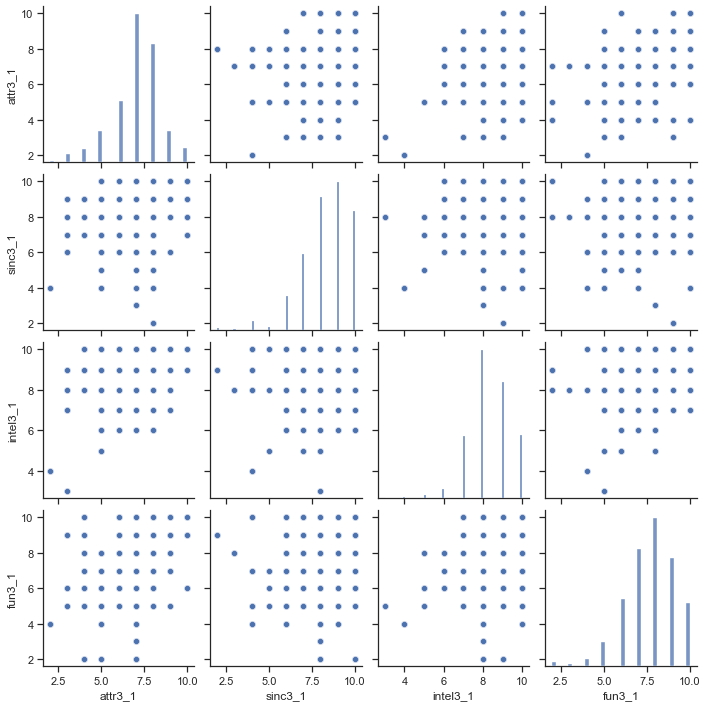

In [616]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(perceptions[list_columns[4:8]]) # to see but potentially to be changed, might not be the best viz, heatmap rather maybe?

In [579]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

In [573]:
dataset[['gender','iid']]

,gender,iid
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8373,1,552
8374,1,552
8375,1,552
8376,1,552
